# Deep Learning End-Course - Problem Statement 1.

# Scenario 1 Problem Statement 

𝐓𝐡𝐞 𝐝𝐚𝐭𝐚𝐬𝐞𝐭 𝐜𝐨𝐧𝐬𝐢𝐬𝐭𝐬 𝐨𝐟 𝟏𝟑𝟕𝟔 𝐢𝐦𝐚𝐠𝐞𝐬 𝐜𝐨𝐧𝐬𝐢𝐬𝐭𝐢𝐧𝐠 𝐨𝐟 𝐭𝐰𝐨  𝐜𝐥𝐚𝐬𝐬𝐞𝐬 – 𝐰𝐢𝐭𝐡_𝐦𝐚𝐬𝐤 𝐚𝐧𝐝 𝐰𝐢𝐭𝐡𝐨𝐮𝐭_𝐦𝐚𝐬𝐤. 𝐓𝐡𝐞 𝐨𝐛𝐣𝐞𝐜𝐭𝐢𝐯𝐞  𝐭𝐨 𝐜𝐫𝐞𝐚𝐭𝐞 𝐚 𝐅𝐚𝐜𝐞 𝐌𝐚𝐬𝐤 𝐃𝐞𝐭𝐞𝐜𝐭𝐨𝐫 𝐮𝐬𝐢𝐧𝐠 𝐂𝐍𝐍 𝐚𝐧𝐝  𝐎𝐩𝐞𝐧𝐂𝐕.

# 𝗗𝗮𝘁𝗮𝘀𝗲𝘁 𝗗𝗲𝘀𝗰𝗿𝗶𝗽𝘁𝗶𝗼𝗻  

𝗧𝗵𝗲 𝗱𝗮𝘁𝗮𝘀𝗲𝘁 𝗶𝘀 𝗮𝗻 𝗮𝗿𝘁𝗶𝗳𝗶𝗰𝗶𝗮𝗹 𝘀𝗲𝘁 𝗼𝗳 𝗳𝗮𝗰𝗲 𝗺𝗮𝘀𝗸 𝗶𝗺𝗮𝗴𝗲𝘀 
• 𝗧𝗼𝘁𝗮𝗹 𝗜𝗺𝗮𝗴𝗲𝘀: 𝟭𝟯𝟳𝟲 
• 𝘄𝗶𝘁𝗵_𝗺𝗮𝘀𝗸 𝗶𝗺𝗮𝗴𝗲𝘀:  
• 𝘄𝗶𝘁𝗵𝗼𝘂𝘁_𝗺𝗮𝘀𝗸 𝗶𝗺𝗮𝗴𝗲𝘀

# Dataset Link : 
https://drive.google.com/drive/folders/1EKZVZlK5YtMnXWYE6YGHG_XtJt_7avk0

# Importing Libraries.

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils

# Input data files are available in the "../input/" directory.
import os
# path to images
path = 'human/'

# categories
categories = ['WithMask','WithoutMask']

# 𝐏𝐥𝐨𝐭𝐭𝐢𝐧𝐠 𝐈𝐦𝐚𝐠𝐞𝐬.

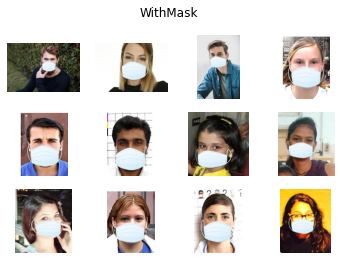

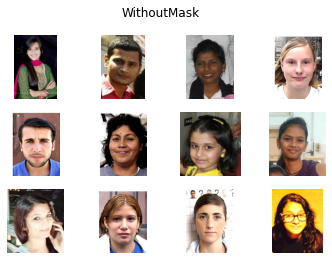

In [20]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [21]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

WithMask  => height min :  141 width min :  110
WithMask  => height max :  4608 width max :  3456
WithoutMask  => height min :  141 width min :  110
WithoutMask  => height max :  960 width max :  960


In [22]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 25
WIDTH = 25
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

print(imagePaths[:10])
import random
random.shuffle(imagePaths)
print(imagePaths[:10])

[['human/WithMask/0-with-mask.jpg', 0], ['human/WithMask/1-with-mask.jpg', 0], ['human/WithMask/10-with-mask.jpg', 0], ['human/WithMask/100-with-mask.jpg', 0], ['human/WithMask/101-with-mask.jpg', 0], ['human/WithMask/103-with-mask.jpg', 0], ['human/WithMask/104-with-mask.jpg', 0], ['human/WithMask/105-with-mask.jpg', 0], ['human/WithMask/106-with-mask.jpg', 0], ['human/WithMask/107-with-mask.jpg', 0]]
[['human/WithMask/209-with-mask.jpg', 0], ['human/WithoutMask/143.jpg', 1], ['human/WithoutMask/368.jpg', 1], ['human/WithoutMask/augmented_image_119.jpg', 1], ['human/WithMask/augmented_image_3.jpg', 0], ['human/WithoutMask/augmented_image_105.jpg', 1], ['human/WithoutMask/151.jpg', 1], ['human/WithoutMask/augmented_image_199.jpg', 1], ['human/WithoutMask/augmented_image_315.jpg', 1], ['human/WithMask/augmented_image_88.jpg', 0]]


In [23]:
# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
    resized = cv2.resize(gray, (WIDTH, HEIGHT))  # .flatten()
    data.append(resized)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

In [24]:
data[0]

array([[242, 250, 254, 248, 252, 250, 253, 253, 254, 254, 252, 254, 255,
        255, 253, 255, 255, 255, 237, 255, 255, 255, 182, 255, 255],
       [255, 255, 254, 249, 255, 255, 254, 255, 255, 254, 252, 249, 251,
        253, 246, 108, 181,  62, 218, 252, 248, 204, 117, 191, 255],
       [255, 255, 254, 254, 255, 255, 254, 254,  53,  12,  37,  52,  58,
         42,  26,  41,  39,  50,  34, 124, 250, 255, 253, 255, 255],
       [253, 253, 251, 229, 148,  90, 136,  23,  12,  14,  17,  26,  55,
         13,   7,   3,  11,  17,  30,  38,  44, 237, 253, 255, 255],
       [255, 255, 254, 254, 255, 253,  48,  19,  33,  21,  11,   5,  19,
          3,   2,  40,  19,  13,  33,  49,  18,  34, 249, 253, 255],
       [255, 255, 253, 255, 253,  15,  11,   3,   2,   2,   0,   1,   0,
          0,  10,   4,   0,  20,  20,   5,  20,  44,  29, 255, 255],
       [255, 255, 251, 254,   0,  18,   5,   0,   7,   5,   6,   4,   6,
          7,  33,  13,   3,   1,   0,   3,  33,  46,  50, 253, 255],
      

In [25]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0 # independent features
data=np.reshape(data,(data.shape[0],WIDTH,HEIGHT,1))
labels = np.array(labels)     # dependent features

In [26]:
data[0]
data.shape[1:]

(25, 25, 1)

In [27]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)
# Preprocess class labels
print(trainY)
trainY = np_utils.to_categorical(trainY, 2)  # actual y 

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)
trainY

[1 0 1 ... 1 0 1]
(1100, 25, 25, 1)
(275, 25, 25, 1)
(1100, 2)
(275,)


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# Modelling. 

In [28]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(25,25,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   # max value access from 2,2 matrix
model.add(Dropout(0.25))
model.add(Flatten()) # to convert array of image  into 1D
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [29]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
35/35 [==============================] - 7s 45ms/step - loss: 0.6675 - accuracy: 0.5845
Epoch 2/25
35/35 [==============================] - 1s 42ms/step - loss: 0.5795 - accuracy: 0.7227
Epoch 3/25
35/35 [==============================] - 2s 43ms/step - loss: 0.4563 - accuracy: 0.7909
Epoch 4/25
35/35 [==============================] - 1s 42ms/step - loss: 0.3386 - accuracy: 0.8555
Epoch 5/25
35/35 [==============================] - 2s 43ms/step - loss: 0.2454 - accuracy: 0.9127
Epoch 6/25
35/35 [==============================] - 2s 44ms/step - loss: 0.1777 - accuracy: 0.9418
Epoch 7/25
35/35 [==============================] - 1s 42ms/step - loss: 0.1828 - accuracy: 0.9309
Epoch 8/25
35/35 [==============================] - ETA: 0s - loss: 0.1594 - accuracy: 0.94 - 2s 43ms/step - loss: 0.1583 - accuracy: 0.9464
Epoch 9/25
35/35 [==============================] - 2s 43ms/step - loss: 0.1228 - accuracy: 0.9545
Epoch 10/25
35/35 [==============================] - 2s 44ms/step -

# Model Accuracy.

<ipython-input-30-59b38f3eb581>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
<ipython-input-30-59b38f3eb581>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


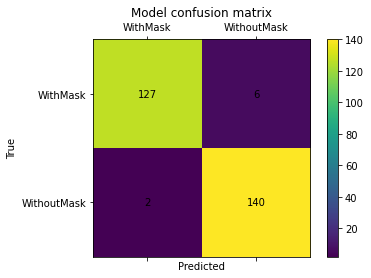

Accuracy : 97.09%


In [30]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(2):
    for j in range(2):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

# Saving the Model 

In [31]:
model.save('mask.model')

INFO:tensorflow:Assets written to: mask.model\assets


#  Using the Model to detect in real-time whether a person is wearing a face mask or not.

**Importing Libraries.**

In [32]:
from keras.models import load_model
import cv2
import numpy as np

**Detect the model using the HaarCascade_frontalface_default.xml file in real time.

In [ ]:
model = load_model('mask.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'mask on:GOOD :)',1:'Wear your mask!! :('}
color_dict={0:(0,255,0),1:(0,0,255)}

while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(25,25))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,25,25,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('Mask detection',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

# Results in real time using the model.

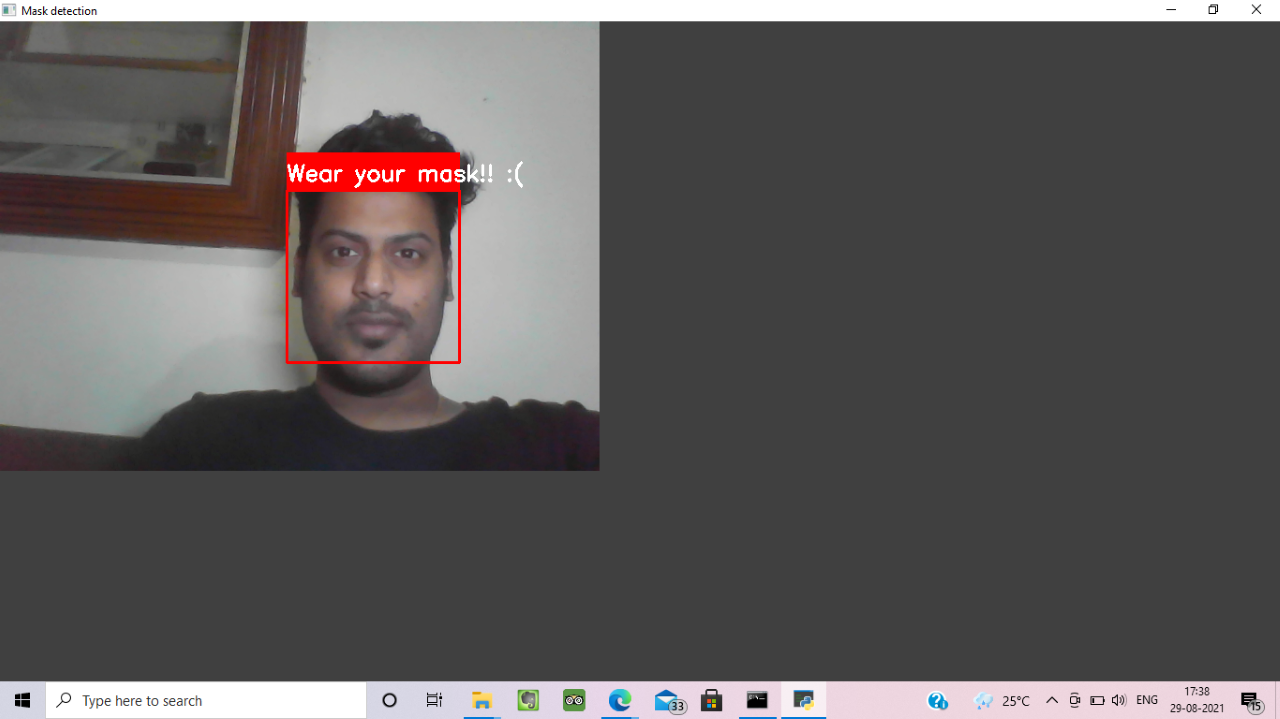

In [11]:
from IPython.display import Image
Image(filename="NoMask.png",width=800,height=800)

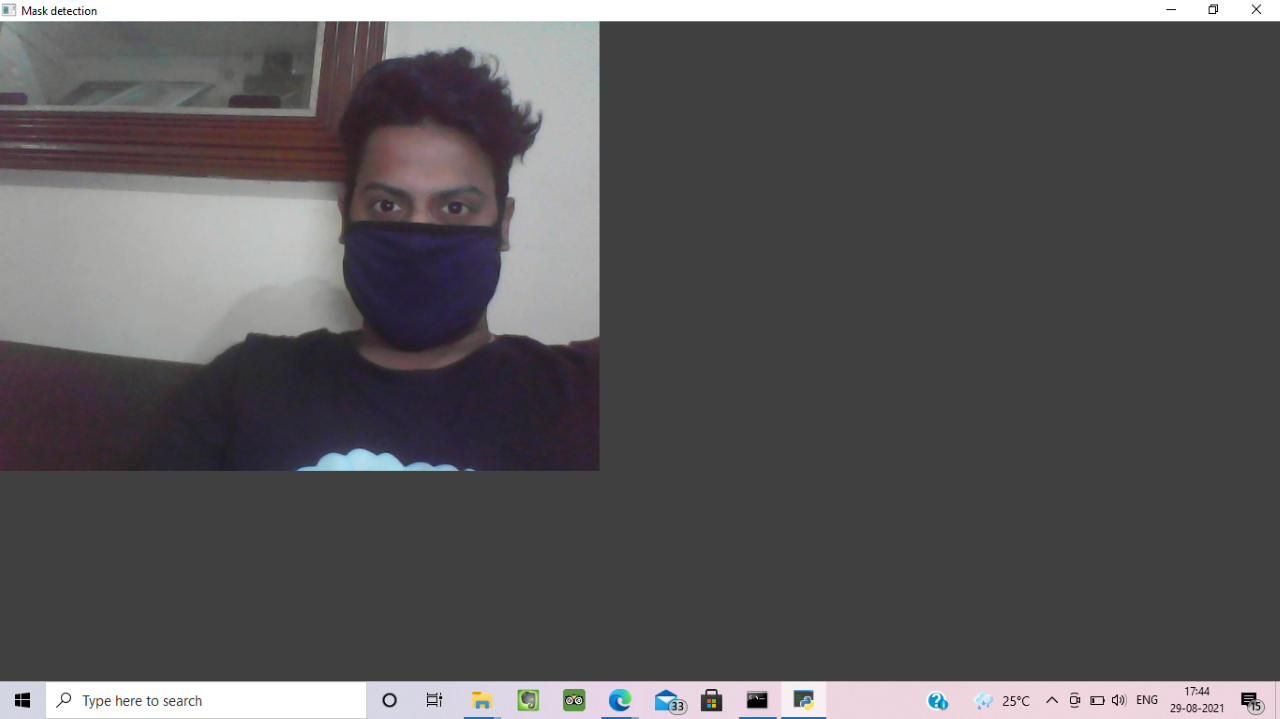

In [12]:
from IPython.display import Image
Image(filename="WithMask.png",width=800,height=800)